# 실습 2. CRM 데이터 고객 세분화
1. 데이터
: Online Retail.csv
2. 예측
: Retail 구매에 따른 고객 세분화
(Segmentaiton
)
3. 특징
: 군집(Clustering) 분석
4. 목표
:
• 군집 알고리즘 사용     
• 'TotalSales', 'OrderCount', 'AvgOrderValue’ 전처리   
• 위의 Feature로 고객 세분화(Clustering)

## Hint
1. Data load  
1. Data Clean-up  
- 0 이상인 것만, dropna 
- InvoiceData 20111201 이상만  
- total sales 구하기
- customerid로 group by, invoiceNo는 nunique로
- 고객마다 몇번 구매한지 구함
- rank 메서드로 매출 순위 내림차순
3. Customer Segmentation via K means Clustering
- Clustering label 넣기
- 클러스터링 시각화 해보기 scatter
- K값에 따라 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 데이터 불러오기

In [2]:
df = pd.read_csv('../data/OnlineRetail.csv')
df.shape

(541909, 8)

### 데이터 확인  

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### null 행 제거

In [6]:
df1 = df.dropna(axis =0)
df1.shape

(406829, 8)

### 각 Invoice의 판매 금액 컬럼 생성

In [7]:
df1['sales'] = df['Quantity'] * df['UnitPrice']
df1.head()

C:\Users\wlgns\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34


### 고객 개인마다의 구매 데이터

In [33]:
df2 = df1.groupby('CustomerID').agg({'sales': sum, 'InvoiceNo': lambda x: x.nunique()})
df2.head()
df2.shape

(4372, 2)

In [9]:
df2.rename(columns = {'sales' : 'TotalSales',
                       'InvoiceNo' : 'OrderCount'},
             inplace = True)
df2['AvgOrderValue'] = df2['TotalSales'] / df2['OrderCount']
df2.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [10]:
df2.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,5.075480,315.883407
std,8219.345141,9.338754,361.237303
min,-4287.630000,1.000000,-4287.630000
25%,293.362500,1.000000,151.991250
50%,648.075000,3.000000,236.987500
75%,1611.725000,5.000000,370.816071
max,279489.020000,248.000000,6207.670000


In [11]:
df2 = df2.rank(method='first')
df2.tail()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
18280.0,625.0,1312.0,1488.0
18281.0,159.0,1313.0,297.0
18282.0,599.0,2619.0,173.0
18283.0,3544.0,4159.0,789.0
18287.0,3414.0,2620.0,3987.0


In [12]:
df2.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4372.000000,4372.000000,4372.000000
mean,2186.500000,2186.500000,2186.500000
std,1262.232018,1262.232018,1262.232018
min,1.000000,1.000000,1.000000
25%,1093.750000,1093.750000,1093.750000
50%,2186.500000,2186.500000,2186.500000
75%,3279.250000,3279.250000,3279.250000
max,4372.000000,4372.000000,4372.000000


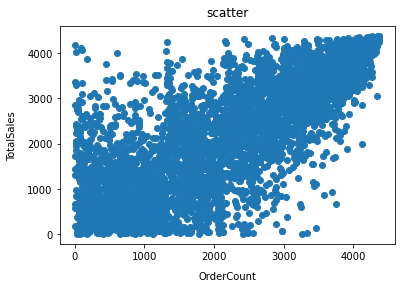

In [14]:
import matplotlib.pyplot as plt
X = df2['OrderCount']
Y = df2['TotalSales']
scatter = plt.scatter(X,Y )

plt.title('scatter', pad = 10)
plt.xlabel("OrderCount", labelpad=10)
plt.ylabel("TotalSales", labelpad=10)
plt.show()

## K-means clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
X = df2[['TotalSales', 'OrderCount', 'AvgOrderValue']]
k_set = [2, 3, 4, 5, 6, 7, 8, 9, 10]
models = []
sil_scores = []
inertia_scores = []

for k in k_set:
    print('**** KMeans with k = %d ****' % k)
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1234)
    kmeans.fit(X)
    
    inertia_score = kmeans.inertia_
    sil_score = silhouette_score(X, kmeans.predict(X))
    print('inertia score: %.4f' % inertia_score)
    print('silhouette score: %.4f' % sil_score)
    print()
    
    inertia_scores.append(inertia_score)
    sil_scores.append(sil_score)

**** KMeans with k = 2 ****
inertia score: 10731299349.6076
silhouette score: 0.4197

**** KMeans with k = 3 ****
inertia score: 6977817508.6535
silhouette score: 0.4178

**** KMeans with k = 4 ****
inertia score: 4985992050.9093
silhouette score: 0.4097

**** KMeans with k = 5 ****
inertia score: 4165763789.6752
silhouette score: 0.3745

**** KMeans with k = 6 ****
inertia score: 3486848152.0636
silhouette score: 0.3687

**** KMeans with k = 7 ****
inertia score: 3006971577.6032
silhouette score: 0.3705

**** KMeans with k = 8 ****
inertia score: 2627657057.5213
silhouette score: 0.3544

**** KMeans with k = 9 ****
inertia score: 2279884469.4979
silhouette score: 0.3654

**** KMeans with k = 10 ****
inertia score: 2056289659.1985
silhouette score: 0.3731



In [22]:
kmeans = KMeans(n_clusters=4).fit(df2[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [23]:
kmeans.labels_

array([2, 1, 1, ..., 2, 0, 1])

In [25]:
df2['Cluster'] = kmeans.labels_

In [26]:
df2.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,43.0,1314.0,43.0,2
12347.0,4054.0,3482.0,3993.0,1
12348.0,3394.0,2621.0,3637.0,1
12349.0,3366.0,1.0,4335.0,3
12350.0,1297.0,2.0,3032.0,3


In [28]:
df2.groupby('Cluster').count()['TotalSales']

Cluster
0     985
1    1094
2    1261
3    1032
Name: TotalSales, dtype: int64

### 시각화

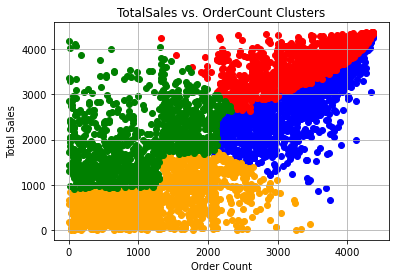

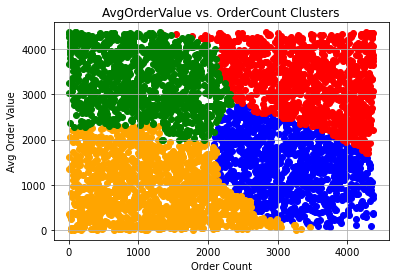

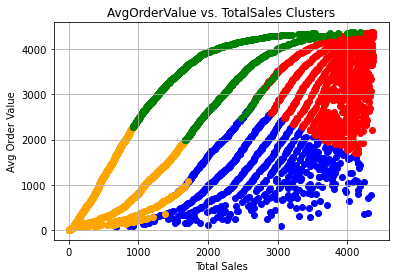

In [32]:
plt.scatter(
    df2.loc[df2['Cluster'] == 0]['OrderCount'], 
    df2.loc[df2['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 1]['OrderCount'], 
    df2.loc[df2['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 2]['OrderCount'], 
    df2.loc[df2['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 3]['OrderCount'], 
    df2.loc[df2['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    df2.loc[df2['Cluster'] == 0]['OrderCount'], 
    df2.loc[df2['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 1]['OrderCount'], 
    df2.loc[df2['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 2]['OrderCount'], 
    df2.loc[df2['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 3]['OrderCount'], 
    df2.loc[df2['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    df2.loc[df2['Cluster'] == 0]['TotalSales'], 
    df2.loc[df2['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 1]['TotalSales'], 
    df2.loc[df2['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 2]['TotalSales'], 
    df2.loc[df2['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    df2.loc[df2['Cluster'] == 3]['TotalSales'], 
    df2.loc[df2['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()